# Clustering
We utilized clustering to create user and item clusters as a way to further experiment with classical recommendation systems like alternating least squares and gradient descent. Through clustering, we improved computational efficiency by minimizing our search space. Clustering was done through the use of uniform manifold approximation and projection, or UMAP, and scikit-learn. 

In [1]:
import sys
sys.path.append("/home/jovyan/work") # If running from container use this directory
import pandas as pd
import ExploratoryAnalysis.clustering as cm

## Clustering News
For news clustering, we first vectorized the titles and abstracts with scikit-learns TF-IDF and BOW vectorizers. Afterwards, we performed dimension reduction to two components with UMAP under both hellinger and euclidean distance metrics, then performed clustering of the results with HDBSCAN and Kmeans.

Embeddings found.


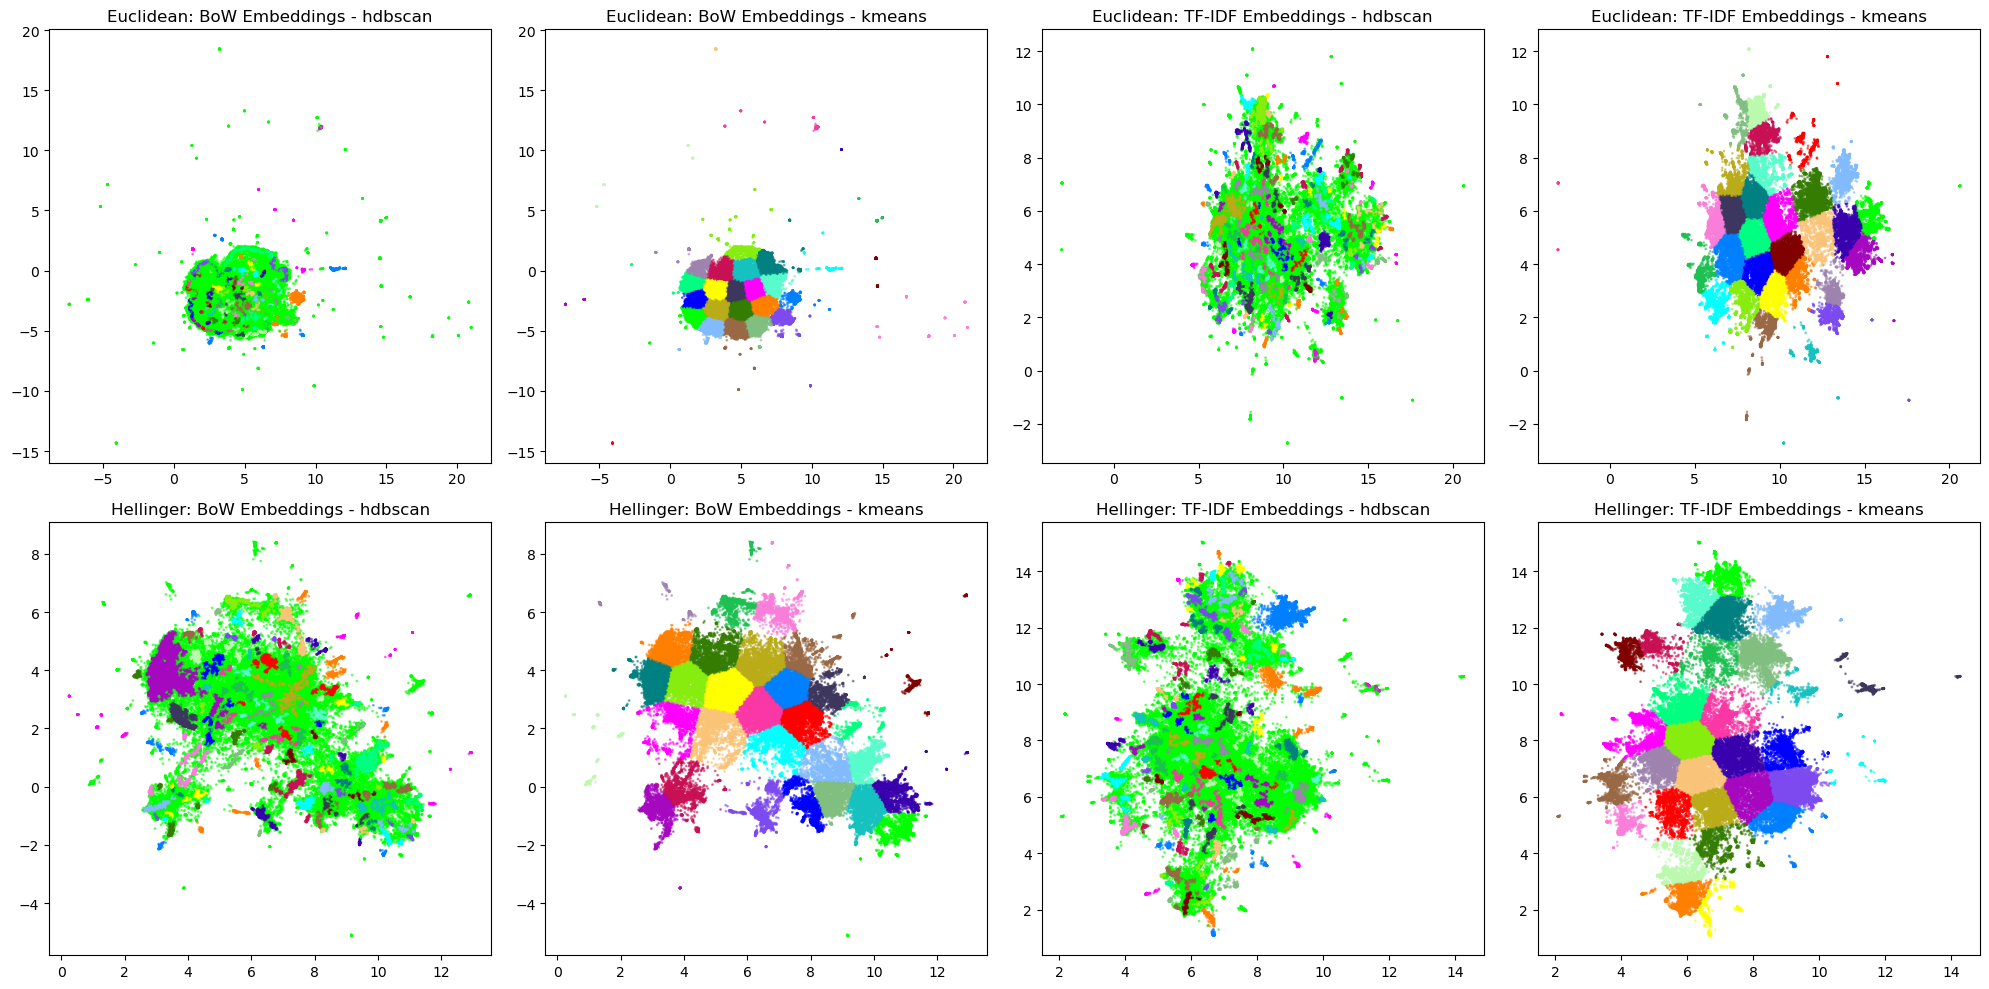

In [2]:
cm.item_cluster_exploration()

### Findings
As visible above, hdbscan classified a lot of items as noise. Since our goal was to simply minimize the search space we avoided using clusters created by hdbscan and instead focused on using clusters created via k-means. We can see that under the hellinger distance metric embeddings had are less outliers and while clusters created for bag of words are more tightly packed together, tf-idf had larger cluster size. Ultimately we chose to apply clusters created by k-means on tf-idf embeddings under the hellinger distance metric. Going beyond how clusters appear visually, below we examine a couple titles belonging to cluster 3. Notably, titles all relate to each other and referring to politics. Pleased with the results we moved on to clustering users.

In [2]:
news_features = pd.read_csv('MIND_large/csv/item_features.csv')
news_features = cm.item_cluster(news_features, 100)
news_features[news_features['cluster'] == 3]['title'].head().to_list()

Item embeddings found, loading now


["The Latest: House measure condemns Trump's Syria withdrawal",
 "US policy collapses into catastrophe following Trump's whims",
 "'ISIS is the biggest beneficiary': Graham lashes out at Trump over Syria withdrawal",
 "Fact-checking Trump's spin about the 'great' outcome in Syria",
 "Trump's Abrupt Shifts in Middle East Unnerve U.S. Allies"]

In [3]:
# Applying our clusters to the item features data
news_features.to_csv('MIND_large/csv/item_features.csv')

## Clustering Users
For user clustering we calculated and normalized their preferences for categories and subcategories and found the median time of day they interact. Similarly to news, we reduced the dimension of these preferences to two components with UMAP under euclidean and cosine distance metrics, then performed clustering of the results with k-means.

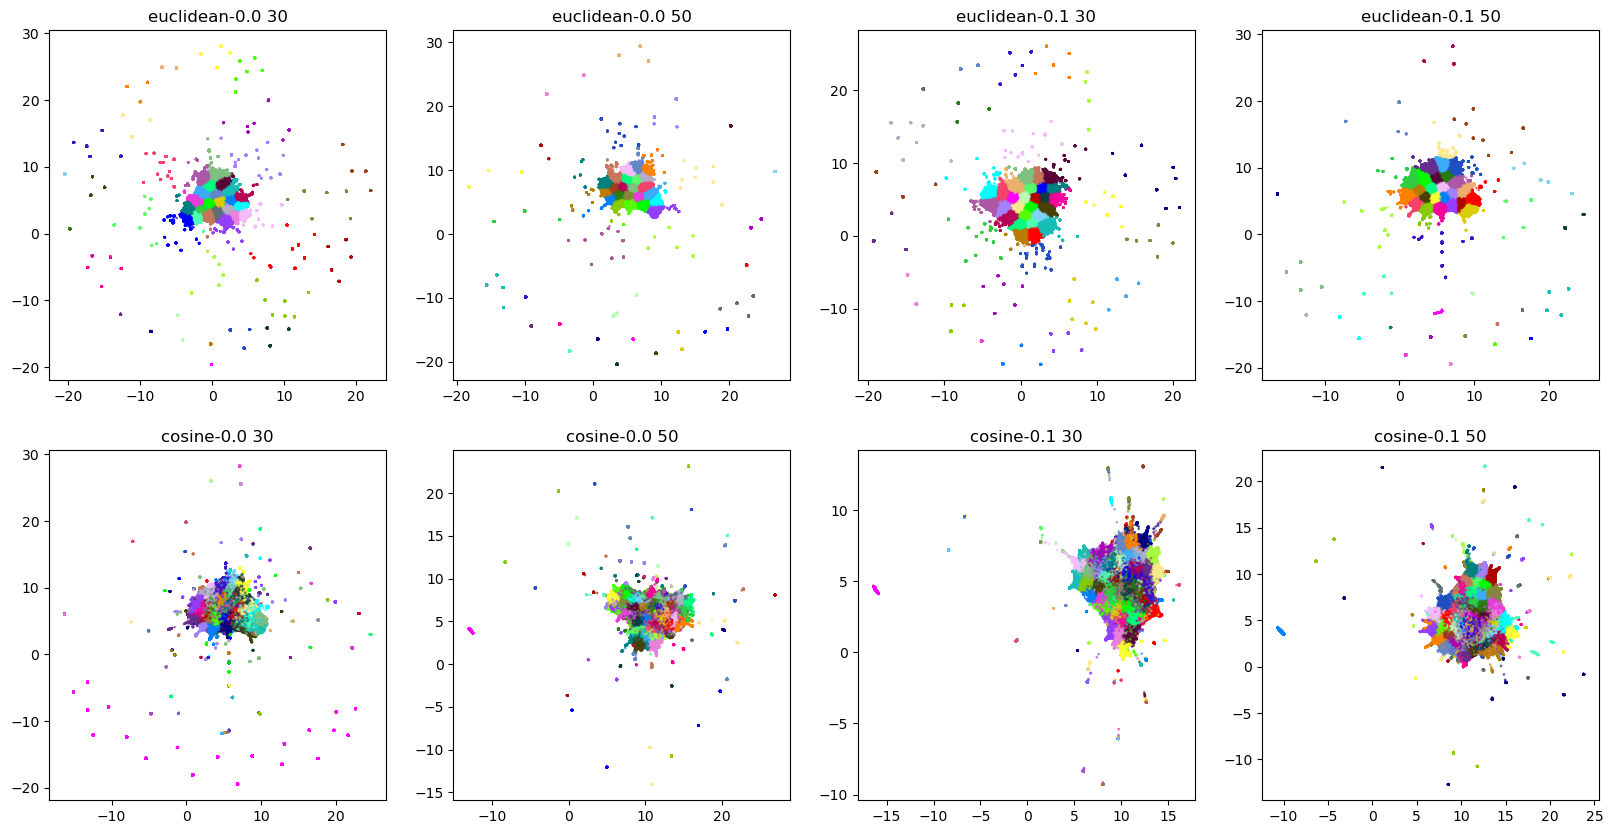

In [3]:
cm.user_cluster_exploration()

### Findings
From the graphs above we were able to determine that embeddings generated under an Euclidean distance metric with a minimum distance of 0.1 and 50 neighbors performed the best. This conclusion was a result of the lower number of outliers and clearly defined clusters. Under the cosine distance metric, we can notice that many clusters lose their well-defined boundaries in the two-dimensional space. While different values of minimum distance and neighbors does also give very promising looking clusters, the resulting shapes appear less defined and uniform.

Similar to our analysis of item clusters we show a brief look at our clustered data. Below are the first 5 users belonging to cluster 42. Clustering this data is challenging as there are many features present, despite this users in cluster 42 have very similar preferences for news, finance, and median interaction time.

In [27]:
user_features = pd.read_csv('MIND_large/csv/user_features.csv', index_col=0)
time = user_features.iloc[:, -2]
user_features = user_features.iloc[:,:18]
user_features["median"] = time

user_features = cm.user_cluster(user_features, 70, n_neigh=100)
user_features[user_features["cluster"] == 42].head()

User embeddings found, loading now


,user_id,news,entertainment,finance,video,tv,movies,music,autos,health,foodanddrink,lifestyle,sports,travel,weather,middleeast,kids,games,median,cluster
13,U10005,0.640000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.080000,0.120000,0.040000,0.080000,0.0,0.0,0.0,0.0,0.583333,42
22,U100077,0.578947,0.000000,0.017544,0.017544,0.017544,0.000000,0.017544,0.052632,0.000000,0.035088,0.070175,0.157895,0.035088,0.0,0.0,0.0,0.0,0.541667,42
102,U100331,0.636364,0.000000,0.036364,0.000000,0.018182,0.018182,0.018182,0.000000,0.127273,0.018182,0.054545,0.036364,0.036364,0.0,0.0,0.0,0.0,0.541667,42
116,U100380,0.536082,0.082474,0.092784,0.010309,0.092784,0.041237,0.020619,0.041237,0.000000,0.000000,0.061856,0.000000,0.020619,0.0,0.0,0.0,0.0,0.500000,42
136,U100430,0.687500,0.000000,0.187500,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.062500,0.000000,0.0,0.0,0.0,0.0,0.583333,42


In [28]:
user_features.to_csv('MIND_large/csv/user_features.csv')

## Conclusions
With our users and items clustered, we moved forward onto modeling where we tested on using either user or item clusters or both. Our favorite clusters are visualized below.

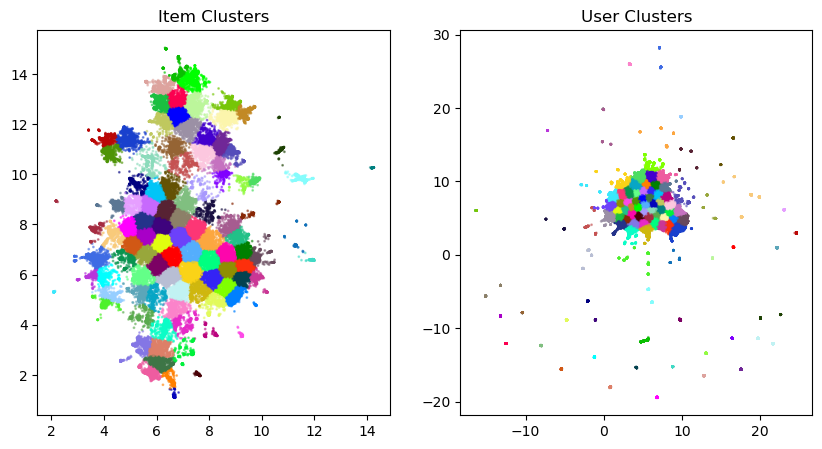

In [3]:
cm.plot_main_clusters()